In [1]:
library(ISLR)
fix(Hitters)
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [2]:
dim(Hitters)

[1] 322  20

In [3]:
sum(is.na(Hitters$Salary))

[1] 59

In [4]:
Hitters=na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters))

[1] 263  20

[1] 0

In [5]:
library(leaps)
regfit.full=regsubsets(Salary~.,Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

In [6]:
regfit.full=regsubsets(Salary~.,data = Hitters,nvmax = 19)
reg.summary=summary(regfit.full)

In [7]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [8]:
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

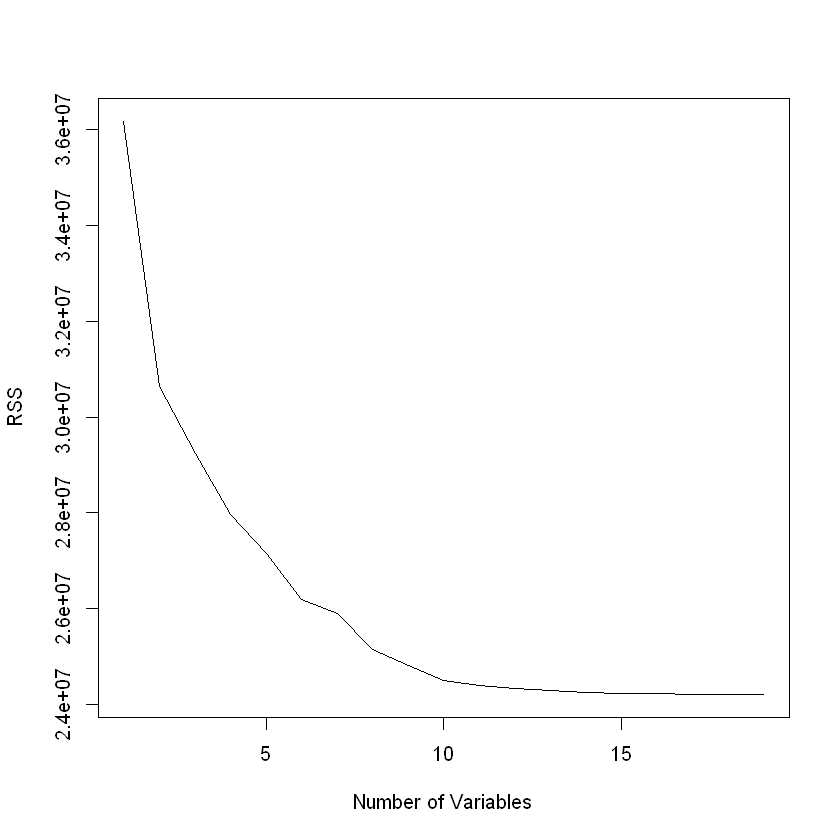

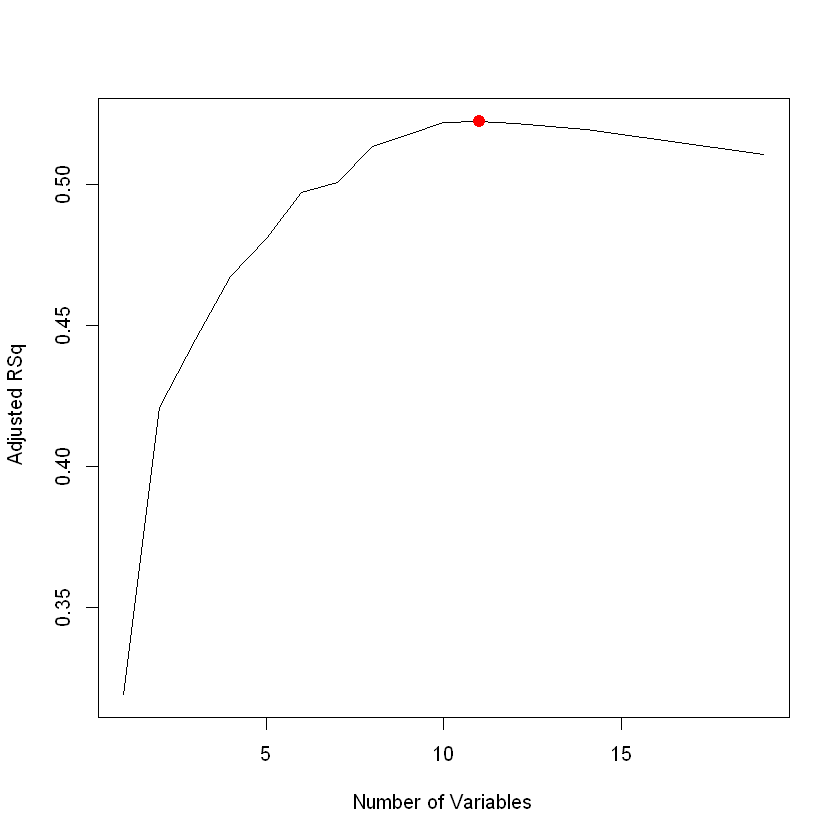

In [9]:

plot(reg.summary$rss,xlab = "Number of Variables",ylab = "RSS",,type='l')
plot(reg.summary$adjr2 ,xlab =" Number of Variables ",ylab=" Adjusted RSq",,type='l')
adjr2.max=which.max(reg.summary$adjr2)
points(adjr2.max, reg.summary$adjr2[adjr2.max], col ="red",cex =2, pch =20)

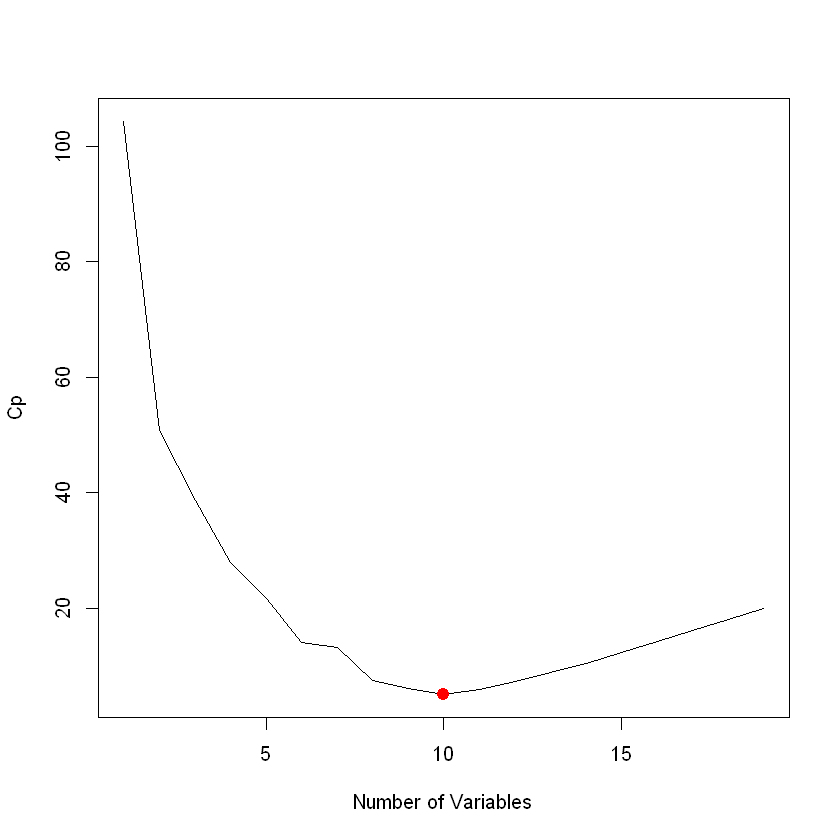

In [10]:
plot(reg.summary$cp ,xlab =" Number of Variables ",ylab="Cp",type='l')
cp.min=which.min(reg.summary$cp)
points (cp.min, reg.summary$cp [cp.min], col ="red",cex =2, pch =20)

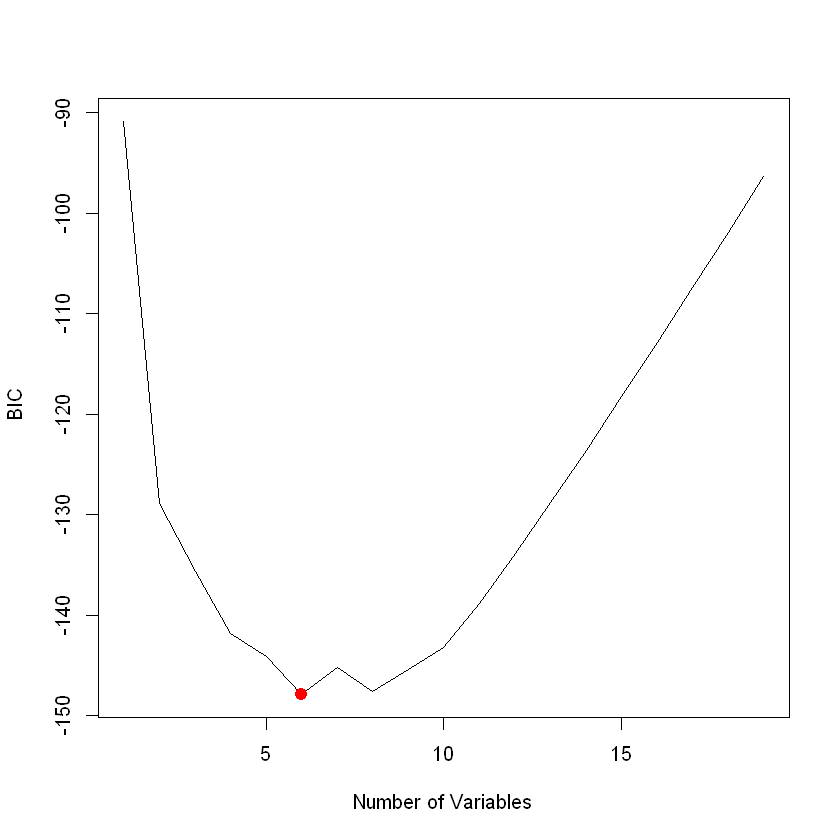

In [11]:
plot(reg.summary$bic ,xlab=" Number of Variables ",ylab=" BIC",type='l')
bic.min=which.min(reg.summary$bic)
points (bic.min, reg.summary$bic [bic.min], col =" red",cex =2, pch =20)

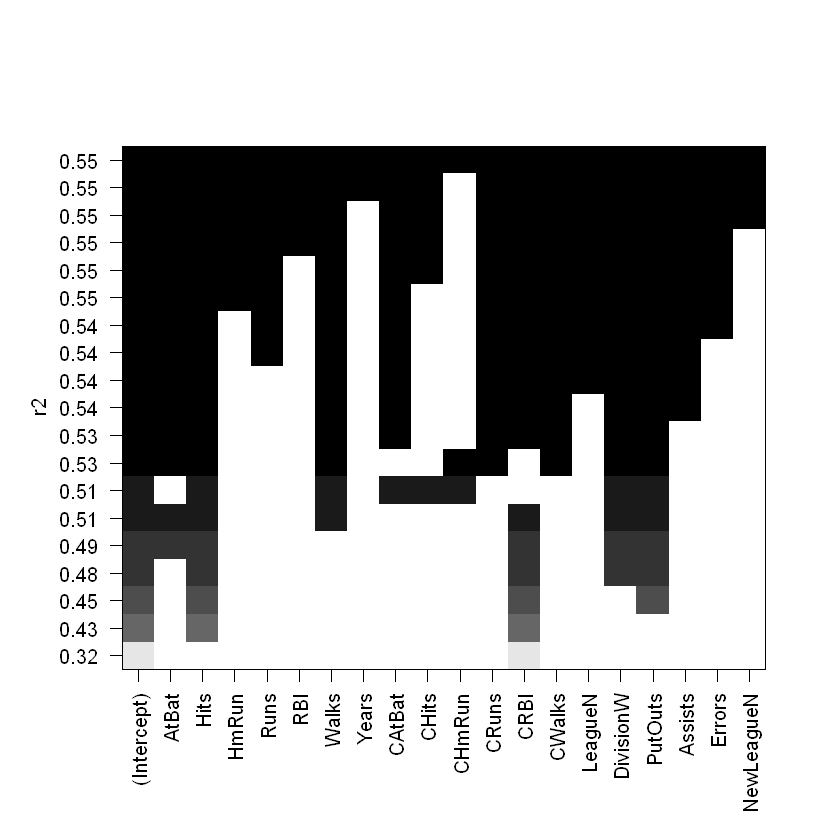

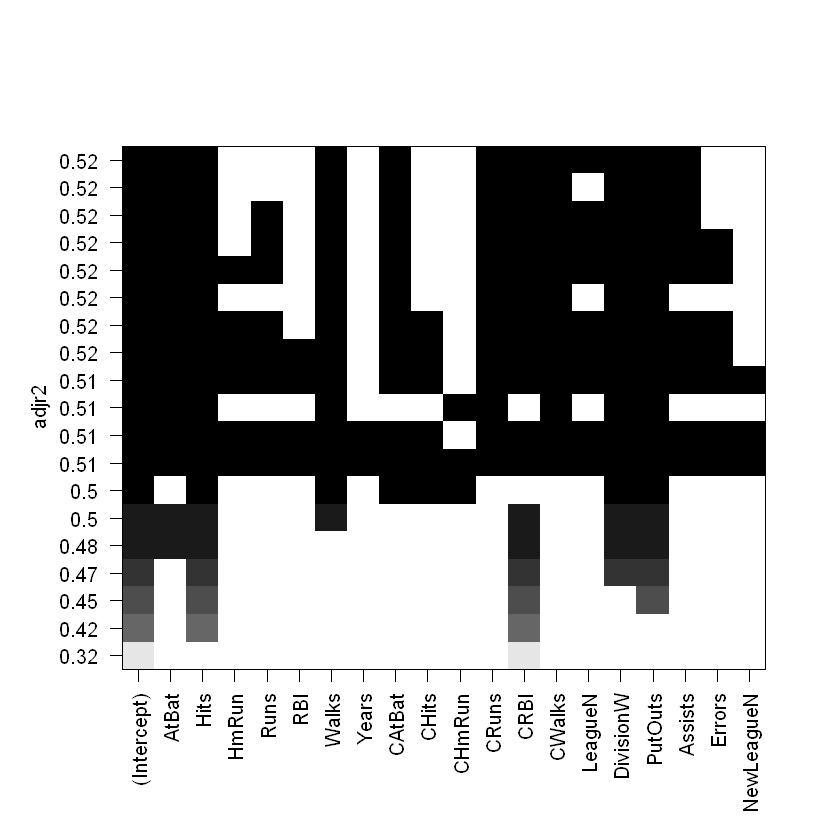

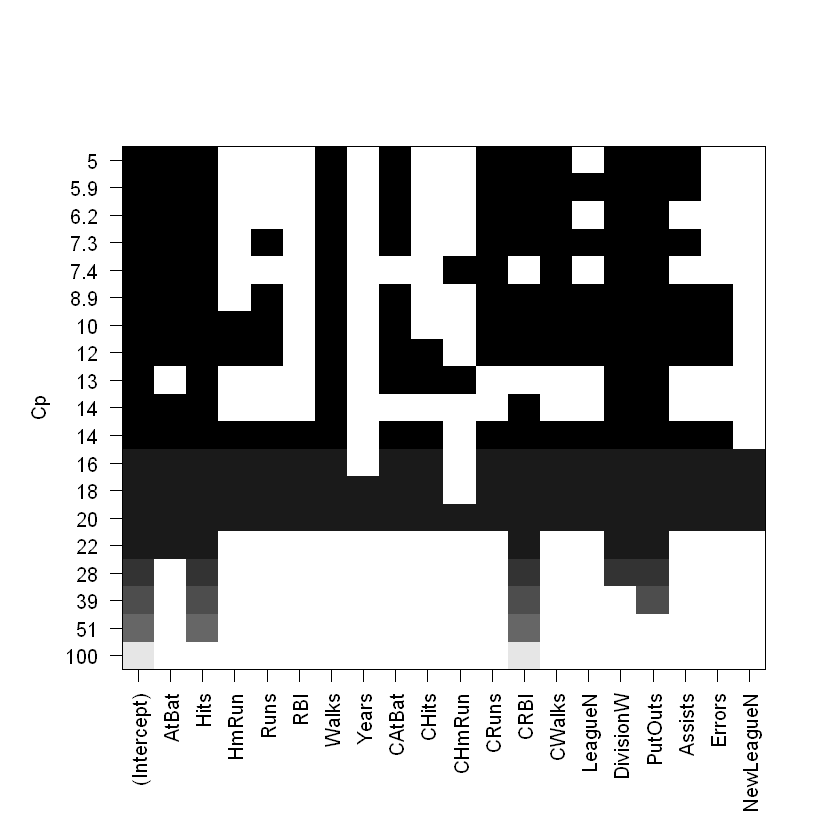

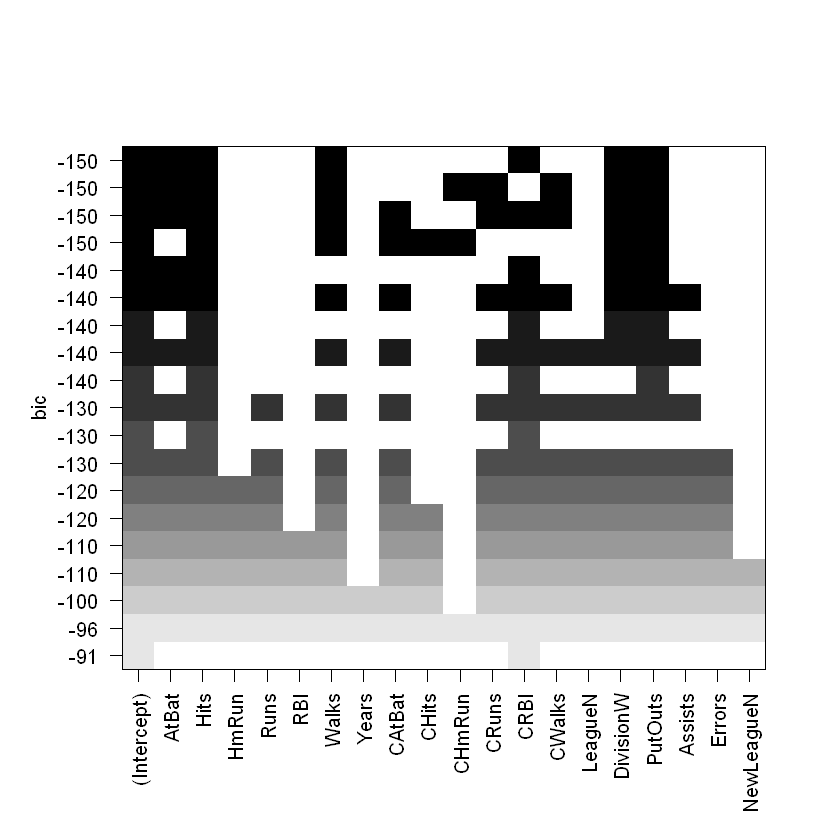

In [12]:
plot(regfit.full,scale = "r2")
plot(regfit.full,scale = "adjr2")
plot(regfit.full,scale = "Cp")
plot(regfit.full,scale = "bic")

In [13]:
coef(regfit.full,6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

# Forward and Backward Stepwise Selection

In [14]:
regfit.fwd=regsubsets(Salary~.,Hitters,nvmax = 19,method = "forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) 

In [15]:
regfit.bwd=regsubsets(Salary~.,Hitters,nvmax = 19,method = "backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 
2  ( 1 

In [16]:
coef(regfit.full,7)
coef(regfit.fwd,7)
coef(regfit.bwd,7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

## Choosing Among Models Using the Validation Set Approach and Cross-Validation

In [17]:
set.seed(1)
train=sample(c(TRUE,FALSE),nrow(Hitters),rep=TRUE)
test=(!train)

In [18]:
regfit.best=regsubsets(Salary~.,data=Hitters[train,],nvmax = 19)

In [19]:
test.mat=model.matrix(Salary~.,data = Hitters[test,])

In [20]:
val.error=rep(NA,19)
for(i in 1:19){
    coefi=coef(regfit.best,id=i)
    pred=test.mat[,names(coefi)]%*%coefi
    val.error[i]=mean((Hitters$Salary[test]-pred)^2)
}

In [21]:
val.error

[1] 164377.3 144405.5 152175.7 145198.4 137902.1 139175.7 126849.0 136191.4
 [9] 132889.6 135434.9 136963.3 140694.9 140690.9 141951.2 141508.2 142164.4
[17] 141767.4 142339.6 142238.2

In [22]:
val.error.min=which.min(val.error)

In [23]:
coef(regfit.best,val.error.min)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
  67.1085369   -2.1462987    7.0149547    8.0716640    1.2425113   -0.8337844 
   DivisionW      PutOuts 
-118.4364998    0.2526925

In [24]:
predict.regsubsets=function(object,newdata,id,...){
    form=as.formula(object$call[[2]])
    mat=model.matrix(form,newdata)
    coefi=coef(object,id=id)
    xvars=names(coefi)
    mat[,xvars]%*%coefi
}

In [25]:
regfit.best=regsubsets(Salary~.,Hitters,nvmax = 19)
coef(regfit.best,val.error.min)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In [26]:
k=10
set.seed(1)
folds=sample(1:k,nrow(Hitters),replace = TRUE)
cv.error=matrix(NA,k,19,dimnames = list(NULL,paste(1:19)))

In [27]:
for(j in 1:k){
    best.fit=regsubsets(Salary~., data=Hitters[folds!=j,],nvmax = 19)
    for(i in 1:19){
        pred=predict(best.fit,Hitters[folds==j,],id=i)
        cv.error[j,i]=mean((Hitters$Salary[folds==j]-pred)^2)
    }
}

In [28]:
mean.cv.error=apply(cv.error,2,mean)
mean.cv.error

1        2        3        4        5        6        7        8 
149821.1 130922.0 139127.0 131028.8 131050.2 119538.6 124286.1 113580.0 
       9       10       11       12       13       14       15       16 
115556.5 112216.7 113251.2 115755.9 117820.8 119481.2 120121.6 120074.3 
      17       18       19 
120084.8 120085.8 120403.5

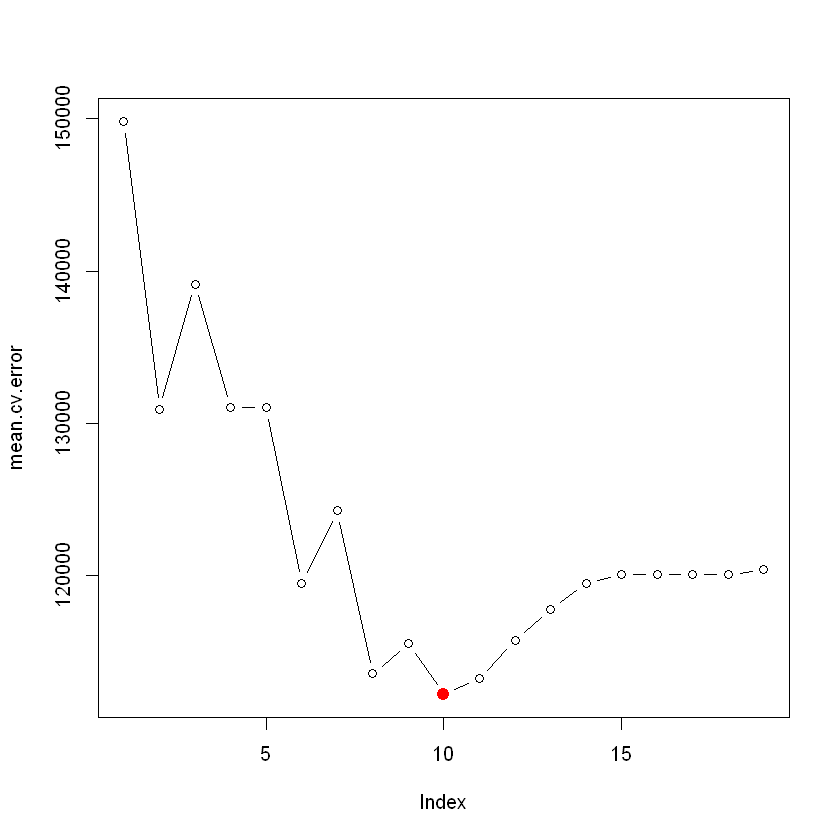

In [29]:
mean.cv.error.min=which.min(mean.cv.error)
par(mfrow = c(1,1))
plot(mean.cv.error,type ="b")
points(mean.cv.error.min,mean.cv.error[mean.cv.error.min],col="red",cex=2,pch=20)

In [30]:
reg.best=regsubsets(Salary~.,Hitters,nvmax = 19)
coef(reg.best,mean.cv.error.min)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

# lab2

In [31]:
x=model.matrix(Salary~.,Hitters)[,-1]
y=Hitters$Salary

In [32]:
library(glmnet)
grid=10^seq(10,-2,length=100)
ridge.mod=glmnet(x,y,alpha=0,lambda =grid)

Loading required package: Matrix

Loaded glmnet 4.1-1



In [33]:
dim(coef(ridge.mod))

[1]  20 100

In [34]:
ridge.mod$lambda[50]
coef(ridge.mod)[,50]
sqrt(sum(coef(ridge.mod)[-1,50]^2))

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

[1] 6.360612

In [35]:
ridge.mod$lambda[60]
coef(ridge.mod)[,60]
sqrt(sum(coef(ridge.mod)[-1,60]^2))

[1] 705.4802

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

[1] 57.11001

In [36]:
predict(ridge.mod,s=50,type="coefficients")

20 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  4.876610e+01
AtBat       -3.580999e-01
Hits         1.969359e+00
HmRun       -1.278248e+00
Runs         1.145892e+00
RBI          8.038292e-01
Walks        2.716186e+00
Years       -6.218319e+00
CAtBat       5.447837e-03
CHits        1.064895e-01
CHmRun       6.244860e-01
CRuns        2.214985e-01
CRBI         2.186914e-01
CWalks      -1.500245e-01
LeagueN      4.592589e+01
DivisionW   -1.182011e+02
PutOuts      2.502322e-01
Assists      1.215665e-01
Errors      -3.278600e+00
NewLeagueN  -9.496680e+00

In [37]:
set.seed(1)
train=sample(1:nrow(x),nrow(x)/2)
test=(-train)
y.test=y[test]

In [38]:
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid,thresh=1e-12)
ridge.pred=predict(ridge.mod,s=4,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 142199.2

In [39]:
mean((mean(y[train])-y.test)^2)

[1] 224669.9

In [40]:
ridge.pred=predict(ridge.mod,s=1e10,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 224669.8

In [42]:
ridge.pred <- predict(ridge.mod, s = 0, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 167789.8

In [44]:
lm(y~x,subset = train)
predict(ridge.mod, s = 0, type = "coefficients")[1:20, ]


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
   274.0145      -0.3521      -1.6377       5.8145       1.5424       1.1243  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
     3.7287     -16.3773      -0.6412       3.1632       3.4008      -0.9739  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    -0.6005       0.3379     119.1486    -144.0831       0.1976       0.6804  
    xErrors  xNewLeagueN  
    -4.7128     -71.0951  


(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 274.2089049   -0.3699455   -1.5370022    5.9129307    1.4811980    1.0772844 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   3.7577989  -16.5600387   -0.6313336    3.1115575    3.3297885   -0.9496641 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  -0.5694414    0.3300136  118.4000592 -144.2867510    0.1971770    0.6775088 
      Errors   NewLeagueN 
  -4.6833775  -70.1616132

[1] 326.0828

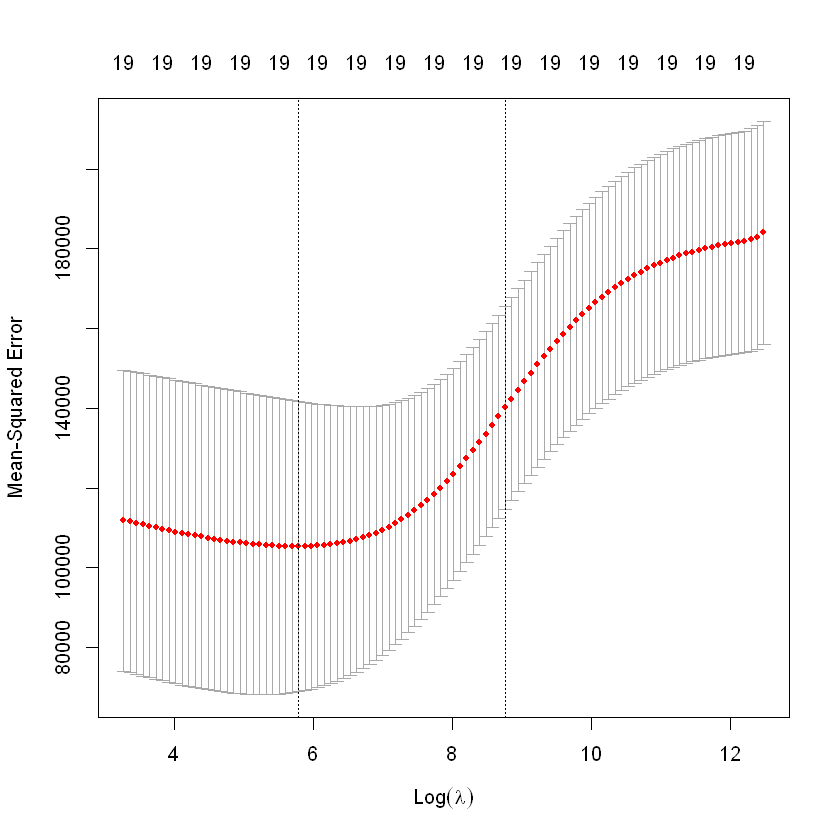

In [45]:
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=0)
plot(cv.out)
bestlam=cv.out$lambda.min
bestlam

In [46]:
ridge.pred=predict(ridge.mod,s=bestlam,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 139856.6

In [47]:
out=glmnet(x,y,alpha = 0)
predict(out,type="coefficients",s=bestlam)[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 15.44383135   0.07715547   0.85911581   0.60103107   1.06369007   0.87936105 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.62444616   1.35254780   0.01134999   0.05746654   0.40680157   0.11456224 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.12116504   0.05299202  22.09143189 -79.04032637   0.16619903   0.02941950 
      Errors   NewLeagueN 
 -1.36092945   9.12487767

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"


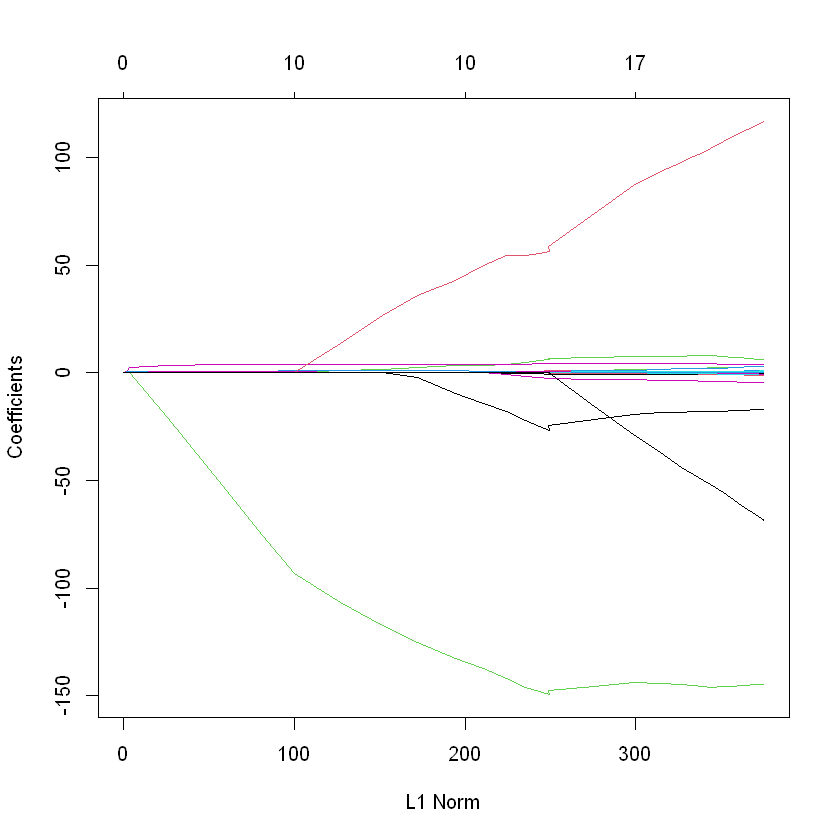

In [49]:
lasso.mod=glmnet(x[train,],y[train],alpha=1,lambda=grid)
plot(lasso.mod)

In [53]:
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=1)
bestlam=cv.out$lambda.min
lasso.pred=predict(lasso.mod,s=bestlam,newx=x[test,])
mean((lasso.pred-y.test)^2)


[1] 143673.6

In [55]:
out=glmnet (x,y,alpha =1, lambda =grid)
lasso.coef=predict (out ,type ="coefficients",s=bestlam )[1:20 ,]
lasso.coef

(Intercept)         AtBat          Hits         HmRun          Runs 
   1.27479059   -0.05497143    2.18034583    0.00000000    0.00000000 
          RBI         Walks         Years        CAtBat         CHits 
   0.00000000    2.29192406   -0.33806109    0.00000000    0.00000000 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
   0.02825013    0.21628385    0.41712537    0.00000000   20.28615023 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-116.16755870    0.23752385    0.00000000   -0.85629148    0.00000000

In [56]:
lasso.coef[lasso.coef !=0]

(Intercept)         AtBat          Hits         Walks         Years 
   1.27479059   -0.05497143    2.18034583    2.29192406   -0.33806109 
       CHmRun         CRuns          CRBI       LeagueN     DivisionW 
   0.02825013    0.21628385    0.41712537   20.28615023 -116.16755870 
      PutOuts        Errors 
   0.23752385   -0.85629148

## Lab 3: PCR and PLS Regression

In [61]:
library(pls)
set.seed(1)
pcr.fit=pcr(Salary~.,data=Hitters,scale=TRUE,validation="CV")
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    352.5    351.6    352.3    350.7    346.1    345.5
adjCV          452    352.1    351.2    351.8    350.1    345.5    344.6
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       345.4    348.5    350.4     353.2     354.5     357.5     360.3
adjCV    344.5    347.5    349.3     351.8     353.0     355.8     358.5
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        352.4     354.3     345.6     346.7     346.6     349.4
adjCV     350.2     352.3     343.6     344.5     344.3     346.9

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

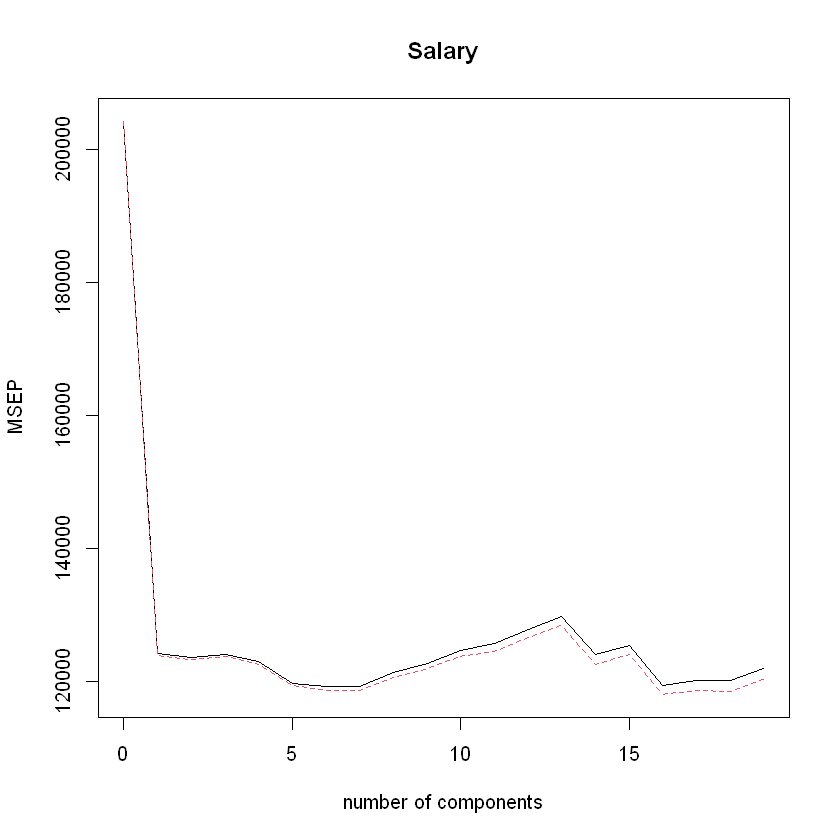

In [64]:
validationplot(pcr.fit ,val.type="MSEP")

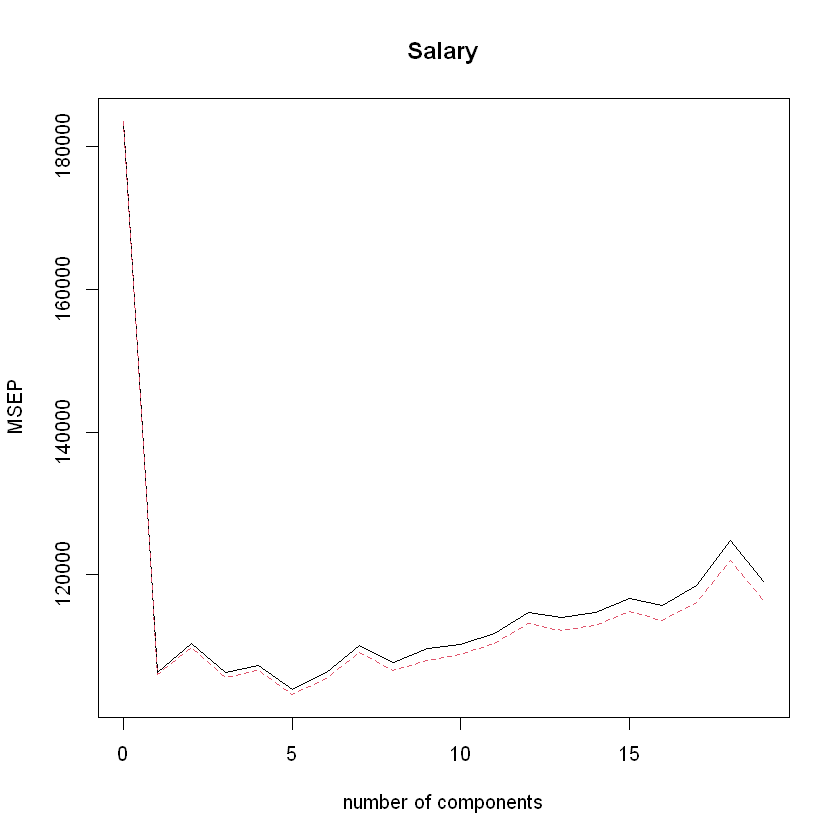

In [65]:
set.seed(1)
pcr.fit=pcr(Salary~.,data=Hitters,subset=train,scale=TRUE,validation="CV")
validationplot(pcr.fit,val.type = "MSEP")

In [68]:
pcr.pred=predict(pcr.fit,x[test,],ncomp=5)
mean((pcr.pred-y.test)^2)

[1] 142811.8

In [69]:
pcr.fit=pcr(y~x,scale=TRUE,ncomp=5)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 5
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps
X    38.31    60.16    70.84    79.03    84.29
y    40.63    41.58    42.17    43.22    44.90


In [75]:
set.seed(1)
pls.fit=plsr(Salary~.,data=Hitters,subset=train,scale=TRUE,validation="CV")
summary(pls.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           428.3    325.5    329.9    328.8    339.0    338.9    340.1
adjCV        428.3    325.0    328.2    327.2    336.6    336.1    336.6
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       339.0    347.1    346.4     343.4     341.5     345.4     356.4
adjCV    336.2    343.4    342.8     340.2     338.3     341.8     351.1
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        348.4     349.1     350.0     344.2     344.5     345.0
adjCV     344.2     345.0     345.9     340.4     340.6     341.1

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         39.13    48.80    60.09    75.07    78.58    81.12    88.21    90.71
Salary 

In [77]:
pls.pred=predict(pls.fit,x[test,],ncomp=3)
mean((pls.pred-y.test)^2)

[1] 152994.6

In [78]:
pls.fit=plsr(Salary~.,data=Hitters,scale=TRUE,ncomp=3)
summary(pls.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 3
TRAINING: % variance explained
        1 comps  2 comps  3 comps
X         38.08    51.03    65.98
Salary    43.05    46.40    47.72
